📍 **Project Title** : Real / Fake Job Posting Prediction

📍 **Aim of the Project** :  This project is to identify the Real/Fake job postings with the utmost accuracy.

📍 **Dataset** : https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction

📍 **Libraries Required :** ```Numpy, Pandas, Matplotlib, Seaborn, Scikit-Learn```

📍 **Module** : Basic Projects of Machine Learning

*********************************************************************


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.tree import  DecisionTreeClassifier, plot_tree

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, plot_confusion_matrix

### Version

In [2]:
# library_name.__version__

## Dataset

In [3]:
data = pd.read_csv('fake_job_postings.csv')
data.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [4]:
data = data.drop("job_id", axis = 1)
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


## Performing EDA

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   title                17880 non-null  object
 1   location             17534 non-null  object
 2   department           6333 non-null   object
 3   salary_range         2868 non-null   object
 4   company_profile      14572 non-null  object
 5   description          17879 non-null  object
 6   requirements         15185 non-null  object
 7   benefits             10670 non-null  object
 8   telecommuting        17880 non-null  int64 
 9   has_company_logo     17880 non-null  int64 
 10  has_questions        17880 non-null  int64 
 11  employment_type      14409 non-null  object
 12  required_experience  10830 non-null  object
 13  required_education   9775 non-null   object
 14  industry             12977 non-null  object
 15  function             11425 non-null  object
 16  frau

In [6]:
data.describe()

,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000
mean,0.042897,0.795302,0.491723,0.048434
std,0.202631,0.403492,0.499945,0.214688
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000


In [7]:
split_location = data["location"].apply(lambda x: str(x).strip().split(','))
split_location = split_location.apply(pd.Series)

In [8]:
split_location[~(split_location[4].isnull())]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
733,US,AL,Birmingham,Montgomery,Atlanta Ga,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1725,US,TX,Austin,San Antonio,Houston,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4396,US,MI,Hartford,Paw Paw,Lawton,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4480,US,CA,San Jose,SFO,Austin,OH,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4527,US,NJ,Lakewood,Brick,Toms River,Jackson,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4650,US,FL,Central Fl,Nort Fl,Georgia,Alabama,Tennessee,South Carolina,North Carolina,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11987,US,CA,Los Angeles,Anaheim,San Diego,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12383,NL,ZH,Rotterdam,The Hague,Utrecht,Amsterdam,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12467,US,NJ,Lakewood,Brick,Toms River,Jackson,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13181,US,CA,Los Angeles,California,San Francisco,California,San Jose,California,Manhattan,New York,Las Vegas,Nevada,Phoenix,Arizona,San Diego,California


In [9]:
data['country'] = split_location[0]
data['location_count'] = data["location"].apply(lambda x: str(x).split(', '))
data['location_count'] = data['location_count'].apply(lambda x:max(len(x)-2,0))

In [10]:
data.head()

,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,location_count
0,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US,1
1,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,1
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US,1
3,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,1
4,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,1


**Viewing Output Column for better understanding**

In [11]:
data['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

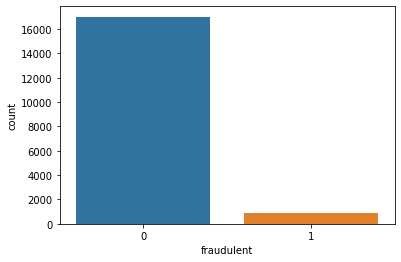

In [12]:
sns.countplot(x = "fraudulent", data = data)
plt.show()

In [13]:
data["location_count"] = pd.DataFrame(data["location_count"])

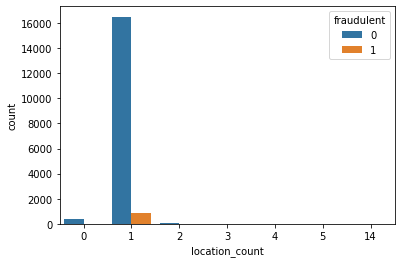

In [14]:
sns.countplot(x = "location_count", hue = "fraudulent", data = data)
plt.show()

In [15]:
data.isnull().sum()

title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
country                    0
location_count             0
dtype: int64

Dropping columns that have atleast 65% of the data missing. As even if we impute the values it may not be upto the mark. Hence its wise to drop such columns.

In [16]:
data = data.drop(["department", "salary_range"], axis = 1)
data.shape

(17880, 17)

In [17]:
col = ["title", "company_profile", "description", "requirements", "benefits"]

for x in col:
    data[x] = data[x].fillna("")

def extract_features(df):
    for x in col:
        data[x + "_len"] = data[x].apply(lambda x: len(str(x)))
        data[x + "_wc"] = data[x].apply(lambda x: len(str(x.split())))

extract_features(data)

In [18]:
data.head()

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,...,title_len,title_wc,company_profile_len,company_profile_wc,description_len,description_wc,requirements_len,requirements_wc,benefits_len,benefits_wc
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,...,16,23,885,1309,905,1278,852,1198,0,2
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,...,41,60,1286,1745,2077,3020,1433,2033,1292,1972
2,Commissioning Machinery Assistant (CMA),"US, IA, Wever",Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,,0,1,0,NaN,...,39,52,879,1302,355,506,1363,1856,0,2
3,Account Executive - Washington DC,"US, DC, Washington",Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,...,33,49,614,868,2600,3637,1429,1958,782,1074
4,Bill Review Manager,"US, FL, Fort Worth",SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,...,19,29,1628,2250,1520,1939,757,1025,21,31


## Basic Modelling

### TFID Vectorizer

- Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
- Medium Blog: https://medium.com/@cmukesh8688/tf-idf-vectorizer-scikit-learn-dbc0244a911a

In [19]:
data['combined_text_data'] = data['company_profile'] + " " + data['description'] + " " + data['requirements'] + " " + data['benefits']
n_features = {
    "title": 100,
    "combined_text_data": 500
}

for c, n in n_features.items():
    tfidf = TfidfVectorizer(max_features = n, norm = "l1", stop_words = "english")
    tfidf.fit(data[c])
    tfidf_train = np.array(tfidf.transform(data[c]).toarray(), dtype = np.float16)

for i in range(n_features[c]):
    data[c + '_tfidf_' + str(i)] = tfidf_train[:, i]

<ipython-input-19-5e0982b5dc6d>:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  data[c + '_tfidf_' + str(i)] = tfidf_train[:, i]


### One-Hot Encoding Catgorical Columns

In [20]:
cat_col = ["employment_type", "required_experience", "required_education", "industry", "function"]

for c in cat_col:
    encoded = pd.get_dummies(data[c])
    data = pd.concat([data, encoded], axis = 1)

### Dropping Irrelevant Columns

In [21]:
drop_col = ["title", "location", "company_profile", "requirements", "benefits", "country"]
drop_col += cat_col

data = data.drop(drop_col, axis = 1)

### Splitting Dataset

In [22]:
train = data.loc[ :9000, :]
test = data.loc[9000: , :]

In [23]:
X_train = train.drop(columns = ["fraudulent", "description", "combined_text_data"])
y_train = train["fraudulent"]

In [24]:
X_test = test.drop(columns = ["fraudulent", "description", "combined_text_data"])
y_test = test["fraudulent"]

## Model Building

### Logistic Regression

In [25]:
log_reg = LogisticRegression(solver = "newton-cg", max_iter = 1500, verbose = 2)
model_log_reg = log_reg.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   14.6s finished


#### Logistic Regression - Prediction

In [26]:
pred_log_reg = model_log_reg.predict(X_test)
print("Accuracy score (Logistic Regression) : {}".format(accuracy_score(pred_log_reg, y_test)))

Accuracy score (Logistic Regression) : 0.9567567567567568


#### Logistic Regression - Classification Report

In [27]:
print(classification_report(pred_log_reg, y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8782
           1       0.18      0.82      0.29        98

    accuracy                           0.96      8880
   macro avg       0.59      0.89      0.64      8880
weighted avg       0.99      0.96      0.97      8880



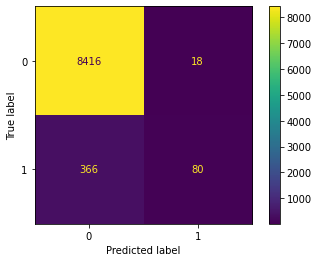

In [28]:
plot_confusion_matrix(model_log_reg, X_test, y_test)
plt.show()

### Logistic Regression CV

In [29]:
log_reg_cv = LogisticRegressionCV(solver = "liblinear", max_iter = 500, verbose = 2)
model_log_reg_cv = log_reg_cv.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   17.2s remaining:    0.0s


[LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear][LibLinear]

[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.7min finished


[LibLinear]

#### Logistic Regression CV - Prediction

In [30]:
pred_log_reg_cv = model_log_reg_cv.predict(X_test)
print("Accuracy score (Logistic Regression CV) : {}".format(accuracy_score(pred_log_reg_cv, y_test)))

Accuracy score (Logistic Regression CV) : 0.9561936936936937


#### Logistic Regression CV - Classification Report

In [31]:
print(classification_report(pred_log_reg, y_test))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      8782
           1       0.18      0.82      0.29        98

    accuracy                           0.96      8880
   macro avg       0.59      0.89      0.64      8880
weighted avg       0.99      0.96      0.97      8880



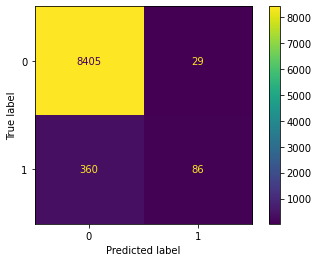

In [32]:
plot_confusion_matrix(model_log_reg_cv, X_test, y_test)
plt.show()

### Support Vector Classifier

In [33]:
svc = SVC(kernel = "sigmoid", coef0 = 1.5,  gamma = "auto")
model_svc = svc.fit(X_train, y_train)

#### Support Vector Classifier - Prediction

In [34]:
pred_svc = svc.predict(X_test)
print("Accuracy score (Support Vector Classifier) : {}".format(accuracy_score(pred_svc, y_test)))

Accuracy score (Support Vector Classifier) : 0.9497747747747748


#### Support Vector Classifier - Confusion Report

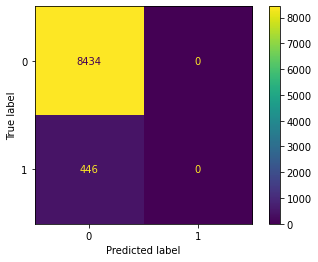

In [35]:
plot_confusion_matrix(model_svc, X_test, y_test)
plt.show()

### Decision Tree Classifier

In [36]:
dec_tree = DecisionTreeClassifier()
model_dec_tree = dec_tree.fit(X_train, y_train)

#### Decision Tree - Prediction

In [37]:
pred_dec_tree = dec_tree.predict(X_test)
print("Accuracy score (Decision Tree Classifier) : {}".format(accuracy_score(pred_dec_tree, y_test)))

Accuracy score (Decision Tree Classifier) : 0.9606981981981982


#### Decision Tree - Confusion Report

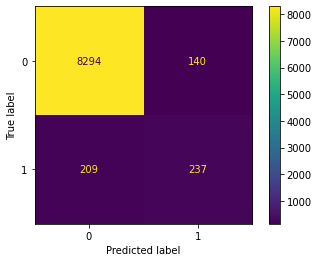

In [38]:
plot_confusion_matrix(model_dec_tree, X_test, y_test)
plt.show()

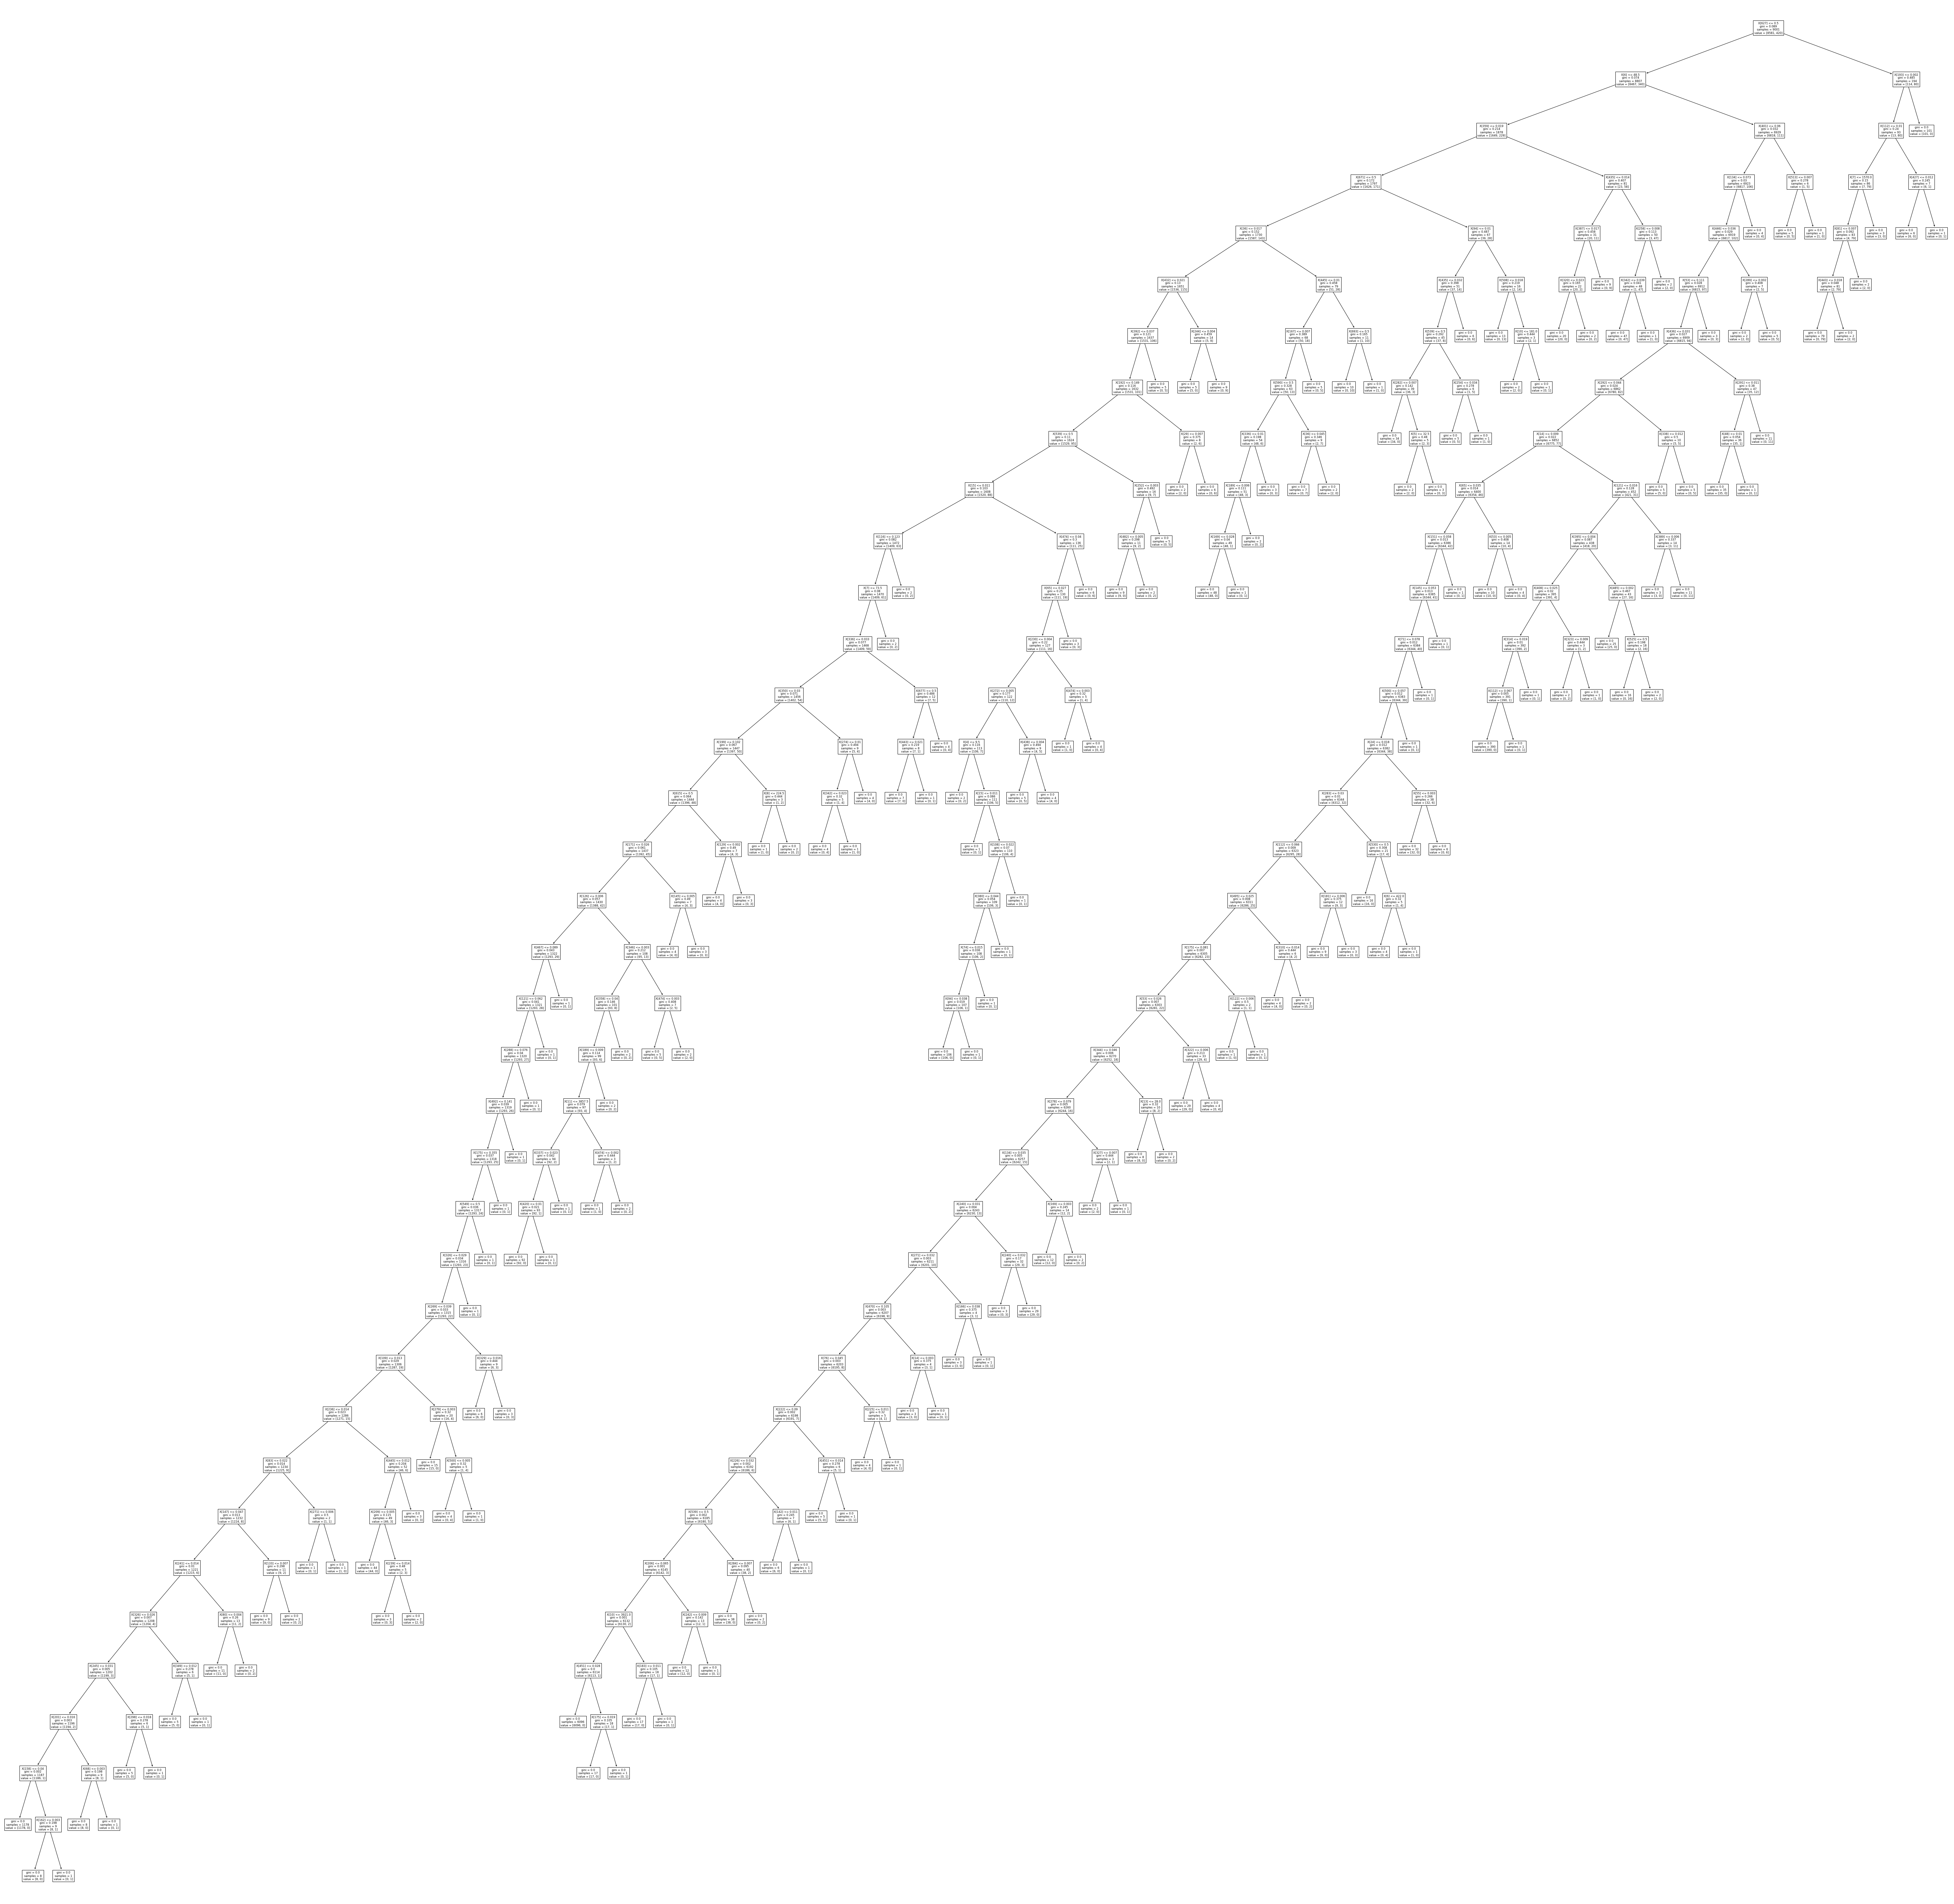

In [42]:
plt.figure(figsize=(100, 100), dpi=80)
plot_tree(dec_tree);